Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 3 </h2>
    <h1> MLP, Regresión Logística y Redes Bayesianas</h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Primer Semestre 2024<br>    
        Fecha de entrega: 17 de mayo
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

A continuación se encuentran las librerías necesarias para elaborar la tarea. Recuerda ejecutar la celda antes de comenzar.

In [1]:
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from typing import List
import seaborn as sns
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator, HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination

## Parte 1: Carga y Preprocesamiento de Datos (10 Pts.)

Para esta tarea, deberás utilizar el dataset [Mushroom Dataset (Binary Classification)](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data) que se puede encontrar en Kaggle.

### 1.1 Carga de Datos

Descarga el dataset y cárgalo a continuación en un dataframe de pandas.

In [2]:
df = pd.read_csv('mushroom.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### 1.2 Descripción del dataset (2 Pts.)

A continuación, presenta una descripción detallada del dataset. Se espera que investigues los datos, y expliques en que consisten las columnas. Explica también cuál es la variable objetivo.

Por lo que logré investigar, cap, gill y stem son partes del hongo, por lo que se tienen distintos datos de cada parte del hongo, en donde cap es la parte superior del hongo, y ahi se tiene el diametro en una unidad de medida que probablemente sea mm y la forma que son ints porque hay formas "definidas". Para el caso de gill, es la parte inferior de la tapa del hongo y es lo que conecta esta con el tronco, el cual tiene la forma en la que se conecta y el color. El stem es el tronco, el tiene el ancho, la altura y el color. Por ultimo, se tiene la epoca de que supongo que se refiere a la de crecimiento y la clase, la cual considero que es la funcion objetivo para prediccion. Además considerando el origen de los datos la clase es si es comestible o no (venenosa).

### 1.3 Limpieza del dataset y Normalización (3 Pts.)

Como podrás notar, el dataset entregado se encuentra limpio de antemano. En particular, se usaron las siguientes técnicas de limpieza:
- Modal imputation
- one-hot encoding
- z-score normalization
- feature selection

Para este item debes:
1. Explicar cada una de las técnicas de limpieza que se utilizaron (con palabras).
2. Revisar en código si existen valores nulos, si hay columnas poco relevantes y si existe desbalance de clases.

MODAL IMPUTATION: Es una tecnica de imputacion de valores faltantes, la imputacion significa reemplazar los valores faltantes por un valor que se considera representativo. Es decir todos los valores que eran nulos no se eliminaron, sino que se reemplazaron por el valor mas comun de esa columna.
https://es.wikipedia.org/wiki/Imputaci%C3%B3n_(estad%C3%ADstica)#:~:text=En%20estad%C3%ADstica%2C%20la%20imputaci%C3%B3n%20es,determinadas%20t%C3%A9cnicas%20estad%C3%ADsticas%20de%20an%C3%A1lisis.

ONE-HOT ENCODING: Es una tecnica de codificacion para variables categoricas, en donde a cada columna categorica se le aplica el one hot encondig y por cada dato se le asigna un numero segun los datos de esa columna, por ejemplo en el caso de la clase, se tenia e y v, y estas se transformaron a 0 y 1 respectivamente. Lo mismo para el color y la forma.

Z-SCORE NORMALIZATION: Esta tecnica de normalización se basa en la media y la desviacion estandar de los datos, tomando en consideracionla distribucion normal de los datos.
https://www.turing.com/kb/data-normalization-with-python-scikit-learn-tips-tricks-for-data-science

FEATURE SELECTION: Esta tencnia se basa en seleccionar las caracteristicas mas relevantes y menos redundantes de los datos, para poder mejorar el rendimiento del modelo y reducir el tiempo de entrenamiento.
https://www.heavy.ai/technical-glossary/feature-selection#:~:text=Feature%20selection%20is%20the%20process,of%20datasets%20continue%20to%20grow.

In [3]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


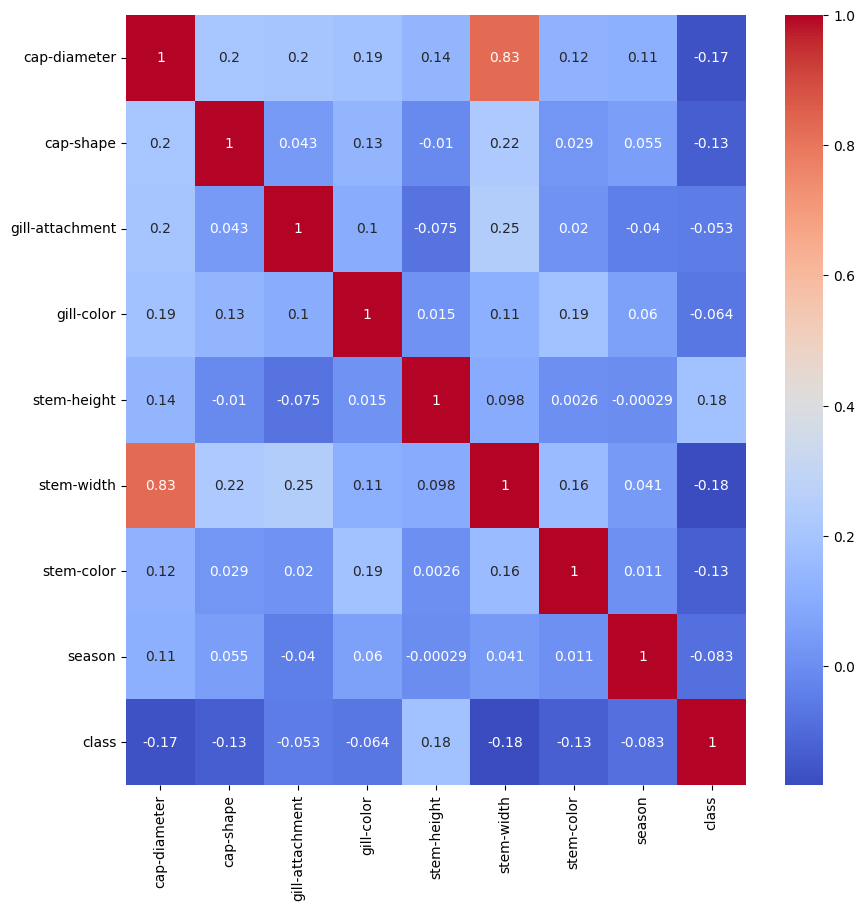

In [4]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [5]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [6]:
df['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

In [7]:
class_counts = df['class'].value_counts()
percentage_0 = (class_counts[0] / len(df)) * 100
percentage_1 = (class_counts[1] / len(df)) * 100

print(f"Porcentaje de 0 en 'class': {percentage_0:.2f}%")
print(f"Porcentaje de 1 en 'class': {percentage_1:.2f}%")

Porcentaje de 0 en 'class': 45.08%
Porcentaje de 1 en 'class': 54.92%


Por el analisis anterior considero que la mayoría de las columnas son igual de relevantes, ya que se ven correlaciones similares entre todas las columnas, por lo que no eliminaria ninguna columna. Lo unico que quizas se podria eliminar es alguna de las columnas de dimensiones, ya que estas estan más correlacionadas entre si, por lo que podria ser "redundante" tenerlas o quizas entregan informacion similar. Pero no las eliminaria. No hay valores nulos, como se menciona antes, estas se "eliminaron" con la imputacion modal. Por ultimo, no hay un desbalance significativo entre las clases, ya que hay un 55% de venenosos y un 45% de comestibles.

### 1.4 Partición en conjuntos de entrenamiento y prueba (0 Pts.)

Parte los datos en conjuntos de entrenamiento y prueba. Utiliza un 80% de los datos para entrenamiento y un 20% para prueba. Utiliza random_state=42.

In [8]:
X = df.drop('class', axis=1)
y = df['class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Parte 2: Redes Bayesianas (15 Pts)

A continuación debes realizar un análisis de redes bayesianas sobre el dataset, con la finalidad de poder inferir la probabilidad de que un hongo sea venenoso o no, dadas las características que se presentan en el dataset.

### 2.1 Redes Bayesianas: Explicación Teórica (5 Pts.)

Investiga sobre `Redes Bayesianas` y entrega una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para demostrar tu aprendizaje. Se espera que tu explicación contenga la respuesta a las siguientes preguntas: 
1. ¿Qué es? 
2. ¿Para qué sirve?
3. ¿Cómo se construye?
4. ¿Qué es un nodo y una arista en una red bayesiana?
5. ¿Qué es un CPD?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

Por lo que logre obtener de la clase, son redes entre variables segun la probabilidad condicional de una variable dada otra, generando relaciones entre estas. Sirven para modelar las relaciones y poder hacer suposiciones de un dato respecto la relacion que tiene con otros. Se construye a partir de las dependencias entre los datos, que son calculables si es que no se tienen y se genera una especie de grafo. Un nodo es una variable y una arista es la relacion entre dos nodos, es decir la dependencia de uno segun el otro, en consideracion a las probabilidades condicionales. Un CPD es la probabilidad condicional de una variable segun otra, es decir el "grado de dependencia" entre estos datos.

Busqueda para informacion más precisa: 
1. ¿Qué es? 

Las redes bayesianas son un modelo probabilistico grafico que se basa en representar las dependecias condicionales entre las variables de un problema, generando un grafico como una red en donde cada nodo es una variable y las aristas son las relaciones.

2. ¿Para qué sirve?

Sirve para tener una manera grafica y sencilla de representar las dependencias de las variables aleatorias y poder hacer inferencias sobre estas, es decir, lograr predecir un valor de una variable la dependencia que tenga con otra.

3. ¿Cómo se construye?

Se construyen identificando las variables y teniendo o calculando las probabilidades condiciones entre cada una de ellas y luego con esta informacion, se puede enlazar la variable con las demás, segun la dependencia que tengan.

4. ¿Qué es un nodo y una arista en una red bayesiana?

Un nodo es una variable y una arista es la relacion entre dos nodos.

5. ¿Qué es un CPD?
Significa distribucion de probabilidad condicional, es decir la probabilidad de que al tener una variable, se de otra o si ocurre un evento ocurra otro.

https://es.wikipedia.org/wiki/Red_bayesiana
https://fastercapital.com/es/contenido/Red-bayesiana--comprension-de-las-redes-bayesianas--una-guia-completa.html
https://economipedia.com/definiciones/probabilidad-condicional.html#:~:text=La%20probabilidad%20condicional%20es%20la,evento%2C%20al%20que%20denominamos%20B.&text=A%20diferencia%20de%20la%20probabilidad,afecta%20la%20probabilidad%20del%20otro.

### 2.2 Aprender la estructura de la red bayesiana (3 Pts.)

Utiliza la librería pgmpy en Python para aplicar el algoritmo Hill Climb Search con el criterio de puntuación BIC y encontrar la estructura óptima de una red bayesiana. Puedes guiarte de las actividades vistas en clases.

In [10]:
data_train = pd.concat([X_train, y_train], axis=1)

In [11]:
hc = HillClimbSearch(data_train)
best_model = hc.estimate(scoring_method=BicScore(data_train))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('gill-attachment', 'cap-shape'), ('gill-attachment', 'stem-color'), ('gill-attachment', 'season'), ('gill-color', 'gill-attachment'), ('gill-color', 'stem-color'), ('gill-color', 'class'), ('stem-color', 'cap-shape'), ('stem-color', 'season'), ('class', 'gill-attachment'), ('class', 'stem-color'), ('class', 'cap-shape'), ('class', 'season')]


### 2.3 Encontrar la estructura óptima (2 Pts.)

En esta sección, debes entrenar la red bayesiana con los datos de entrenamiento usando la estructura óptima encontrada en la sección anterior. Luego, debes imprimir las probabilidades condicionales de la red bayesiana.

In [12]:
model = BayesianNetwork(best_model.edges())
model.fit(data_train, estimator=BayesianEstimator, prior_type="BDeu")
for cpd in model.get_cpds():
    print(cpd)

+--------------------+-----+-----------------------+
| class              | ... | class(1)              |
+--------------------+-----+-----------------------+
| gill-color         | ... | gill-color(11)        |
+--------------------+-----+-----------------------+
| gill-attachment(0) | ... | 0.3353917477693242    |
+--------------------+-----+-----------------------+
| gill-attachment(1) | ... | 0.22963070136418698   |
+--------------------+-----+-----------------------+
| gill-attachment(2) | ... | 0.027676233778827164  |
+--------------------+-----+-----------------------+
| gill-attachment(3) | ... | 7.695966236256928e-06 |
+--------------------+-----+-----------------------+
| gill-attachment(4) | ... | 0.039829703659124104  |
+--------------------+-----+-----------------------+
| gill-attachment(5) | ... | 0.1825683286362286    |
+--------------------+-----+-----------------------+
| gill-attachment(6) | ... | 0.1848955888260727    |
+--------------------+-----+------------------

### 2.4 Inferencia sobre los datos (5 pts)

Finalmente, debes realizar inferencia sobre la red bayesiana. Para esto, se te pide que calcules la probabilidad de que los siguientes hongos sean venenosos o no, dadas sus características:

- Hongo 1: 'gill-color': 7, 'stem-color': 3, 'cap-shape': 1
- Hongo 2: 'stem-color': 2, 'cap-shape': 3
- Hongo 3: 'gill-attachment': 2, 'gill-color': 3

In [13]:
infer = VariableElimination(model)

hongo_1 = {'gill-color': 7, 'stem-color': 3, 'cap-shape': 1}
hongo_2 = {'stem-color': 2, 'cap-shape': 3}
hongo_3 = {'gill-attachment': 2, 'gill-color': 3}

print("Hongos 1:")
print(infer.map_query(variables=['class'], evidence=hongo_1))

print("Hongos 2:")
print(infer.map_query(variables=['class'], evidence=hongo_2))

print("Hongos 3:")
print(infer.map_query(variables=['class'], evidence=hongo_3))

Hongos 1:


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'class': 0}
Hongos 2:


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

{'class': 1}
Hongos 3:


0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'class': 1}


## Parte 3: Perceptron y MLP (15 Pts.)

### 3.1 Perceptron: Explicación teórica (2.5 Pts)

Investiga sobre `Perceptron` y entrega una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para demostrar tu aprendizaje. Se espera que tu explicación contenga la respuesta a las siguientes preguntas: 
1. ¿Qué es? 
2. ¿Para qué sirve? 
3. ¿Cómo funciona? 
4. ¿Cuáles son sus ventajas y desventajas? 
5. ¿En qué situaciones se puede utilizar? 
6. ¿Qué tipo de problemas puede resolver? 
7. ¿Qué son los pesos y función de activación? 
8. ¿Cuáles son las limitaciones del modelo?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

1. ¿Qué es?: Es una red neuronal simple que se basa en tener solo una capa y un nodo de salida, es una sola neurona artificial.
2. ¿Para qué sirve?: Sirve para encontrar patrones, caracteristicas o tendencias en los datos que ingresan, principalmente clasificar datos.
3. ¿Cómo funciona?: Funciona en base a una funcion matematica, en donde a cada entrada se le asigna (multiplica) un peso, en donde el resultado puede ser negativo o positivo, si es que el resultado es positivo se activa la neurona con una funcion de activacion, ademas solo se activa si el resultado es mayor a un umbral determinado por la funcion de activacion. Sale un resultado y se debe comparar con uno conocido, y si hay un error se ajustan los pesos. 
4. ¿Cuáles son sus ventajas y desventajas?: Entre las ventajas estan que es simple y rapido, ademas de flexible, pues en comparacion a una red neuronal compleja es mas facil de entender y ajustar. Tiene un alta capacidad de aprendizaje. Entre sus desventajas se destaca, que se necesita un gran numero de datos para poder aprender y de calidad, pueden ser dificiles de interpretar, pueden sobreajustar facilmente y tiene una gran cantidad de hiperparametros que ajustar.
5. ¿En qué situaciones se puede utilizar?: Se suele utilizar para problemas de clasificacion simple, pues puede asociar muy bien patrones, tambien sirve para la segmentacion y clasificacion de imagenes, comprension de datos entre otros.
6. ¿Qué tipo de problemas puede resolver?: Como se menciona anteriomente, puede resolver problemas de clasificacion simple, principalmente binaria y algunos problemas de regresion lineal. Usualmente las relaciones deben ser relativamente simples. 
7. ¿Qué son los pesos y función de activación?: Los pesos son valores numericos que como se menciono antes se multiplican con las entradas y determinan la importancia de cada una de estas. La funcion de activacion, tambien como se menciono anteriormente es una funcion matematica que aplica la suma de las entradas multiplicadas por los pesos y de acuerdo a su valor determina la salida de la neurona.
8. ¿Cuáles son las limitaciones del modelo?: En general no logra extrapolar muy bien, depende mucho del entrenamiento y de la cantidad de datos. Además para problemas mas complejos no es muy util, ya que si los datos no son linealmente separables, no converge.

https://datascientest.com/es/perceptron-que-es-y-para-que-sirve

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/ventajas-y-desventajas-0

https://es.wikipedia.org/wiki/Perceptr%C3%B3n

Clases y conocimientos anteriores aprendidos en IA

### 3.2 Multi-Layer Perceptron: Explicación teórica (2.5 Pts)

De forma similar a 2.1, investiga sobre `Multi-Layer Perceptron` y entrega una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para demostrar tu aprendizaje. Se espera que tu explicación contenga la respuesta a las siguientes preguntas:
1. ¿Qué es?
2. ¿Para qué sirve?
3. ¿Cómo funciona?
4. ¿Cuáles son las diferencias con el Perceptron?
5. ¿Cuándo es mejor utilizar un MLP en vez de un Perceptron?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

1. ¿Qué es?: Es una red neuronal que se basa en tener más de una capa de neuronas, es decir de capas ocultas, pero sigue siendo una red neuronal simple, pues tiene una sola neurona de salida.
2. ¿Para qué sirve?: Tambien sirve para problemas de clasificacion y regresion, pero es mejor que un perceptron simple pues hace un mayor analisis, debido a que tiene más capas, entonces puede encontrar patrones más complejos.
3. ¿Cómo funciona?: Hace basicamente lo mismo que un perceptron, como se explico anteriormente, pero como aqui se tienen más capas ese proceso se repite para cada capa y se hace el backpropagation para ajustar los pesos de cada una, entonces uno tiene un proceso más complejo y reiterativo.
4. ¿Cuáles son las diferencias con el Perceptron?: La principal diferencia es que tiene más de una capa, tambien que puede tener más de una funcion de activacion y además estas pueden ser no lineales.
5. ¿Cuándo es mejor utilizar un MLP en vez de un Perceptron?: Para problemas más complejos, en donde los datos no son linealmente separables, por ejemplo para clasificacion multiclase, regresion no lineal, etc.

https://es.wikipedia.org/wiki/Perceptr%C3%B3n_multicapa

https://juansensio.com/blog/023_mlp_backprop

Clases y conocimientos anteriores aprendidos en IA

### 3.3 Crear y Entrenar MLP (4 Pts)

Entrene un clasificador de MLP con los datos de `entrenamiento`. Tienes libertad para modificar los hiperparámetros, cantidad de capas, neuronas, etc. Pero toda decisión debe ser `justificada`. Recuerda que el objetivo es obtener el mejor modelo posible. Para justificar tus decisiones puedes experimentar, buscar documentación o lo que estimes conveniente.

**Importante:** No se evalúa que el modelo sea el mejor, si no que se justifiquen las decisiones tomadas. Es decir, no sirve de nada tener un porcentaje de acierto alto si no se justifica por qué se llegó a ese resultado. En esta parte, el código tiene menor relevancia. Lo importante es la justificación.

In [14]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

callback = EarlyStopping(monitor='val_loss', patience=3)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step - accuracy: 0.5628 - loss: 1.4131 - val_accuracy: 0.5508 - val_loss: 0.9058
Epoch 2/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.5966 - loss: 0.9867 - val_accuracy: 0.6364 - val_loss: 0.6384
Epoch 3/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.6003 - loss: 0.8775 - val_accuracy: 0.6508 - val_loss: 0.6796
Epoch 4/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.6216 - loss: 0.8197 - val_accuracy: 0.6631 - val_loss: 0.6150
Epoch 5/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.6338 - loss: 0.7597 - val_accuracy: 0.6203 - val_loss: 0.8603
Epoch 6/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.6433 - loss: 0.7281 - val_accuracy: 0.5920 - val_loss: 0.7676
Epoch 7/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.6437 - loss: 0.6974 - val_accuracy: 0.6300 - val_loss: 0.6224
Epoch 8/100
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 

Decidí utilizar 2 capas internas, una de 128 neuronas y otra de 64, por las tareas, los codigos y busqueda en internet consideré que era un buen balance además puede permitir encontrar patrones más complejos. Como input utilice la cantidad de datos que tiene el dataset de entrenamiento. Para las funciones de activacion utilice relu para las capas internas, porque permite que el modelo sea no lineal. Para la capa de salida utilice sigmoid, ya que queria de salida valores probabilisticos entre 1 y 0, ya que estas eran las clases. Use el callback utilizado en clases pero con un val_loss ya que permite que el modelo se detenga cuando no mejora y evitar el sobreajuste. Las epocas las elegi en base a prueba y error, además que en general no converge y siempre mejoora entonces al ponerle más epocas tuvo mejor accuracy. Además escogi un validation_split de 0.2 para tener un conjunto de validacion y evitar el sobreajuste.

https://keras.io/api/layers/activations/

### 3.4 Evaluar MLP (3 Pts)

Evalúe el modelo con los datos de `testing` y calcule `accuracy`, `precision`, `recall` y `f1-score`. Puedes apoyarte de un reporte de clasificación. Comenta todos los resultados y explica qué significa cada métrica.

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8915 - loss: 0.2376
Loss: 0.2453301101922989, Accuracy: 0.8876653909683228


El loss significa la perdida, es decir que tan bien o mal se estanciendo las predicciones con los datos reales, en general el valor obtenido considero que es relativamente bueno, pero que puede estar teniendo bastantes errores, aunque esto tambien se puede dar por el numero de epocas.

El accuracy de un 88% considero que es un valor bastante bueno pues significa que el modelo acierta en un 88% de los casos. 

In [16]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # recomendado por gpt para transformar las probabilidades en 0 y 1 que determinaria la clase

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


In [17]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8876654020542241


In [18]:
print("\nClassification Report : ")
print(classification_report(y_test, y_pred))


Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4909
           1       0.89      0.90      0.90      5898

    accuracy                           0.89     10807
   macro avg       0.89      0.89      0.89     10807
weighted avg       0.89      0.89      0.89     10807



En cuanto a la precision es bastante buena para ambas clases, aunque un poco mejor para la clase 1, es decir que se logra identificar mejor a la clase uno y esto puede ser por la cantidad de datos, que en el caso de 1 son un 55%.

El recall tambien es alto, para ambos y para la clase uno más, lo que significa que se identifica de manera más efectiva a la clase 1.

El f1-score es un promedio ponderado de la precision y el recall entonces por consecuencia este es un valor alto y se ve que el modelo es bastante equilibirado comparando los resultados de ambas clases.

### 3.5 Matriz de Confusión (3 Pts)

Genere una `matriz de confusión` normalizada del modelo y responda las preguntas:
1. ¿Qué significa cada fila de la matriz?
2. ¿Qué significa cada columna de la matriz?
3. Explique error `tipo I` y error `tipo II` en base a la matriz de confusión.
4. ¿Cuál es el error más grave en este caso?

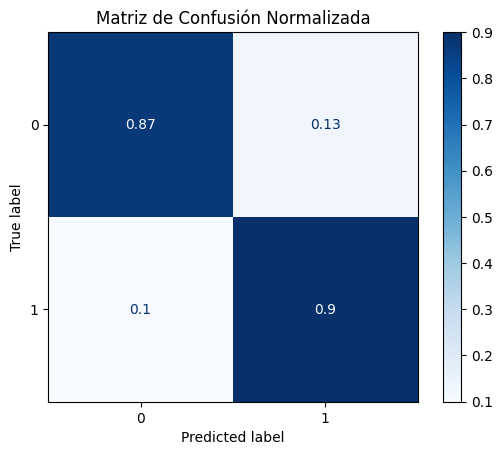

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Normalizada")
plt.show()

Cada fila son las clases reales, es decir si es venenoso o no, 1 o 0. 

Cada columna son las predicciones hechas por el modelo para cada clase, la primera es la prediccion para el 0 y la segunda para el 1.

El error tipo I son los falso positivos, es decir cuando se predice incorrectamente la clase positiva, en este caso es en (0, 1), en donde un 13% de los casos reales de que no son venenosos (0) se predijo como que si eran venenosas.

El error de tipo II son los falsos negativos, es decir cuando se predice incorrectamente la clase negativa, en este caso es en (1, 0), en donde un 10% de los casos reales de que son venenosos (1) se predijo como que no.

## Parte 4: Regresión Logística (15 Pts.)

### 4.1 Regresión Logística: Explicación teórica (4.5 pts)

Investiga sobre `Regresión Lógistica` y da una explicación con tus propias palabras de cómo funciona. Nuevamente no se espera una demostración matemática, el objetivo es que demuestres tu aprendizaje. Debes responder las siguientes preguntas:
1. ¿Qué es?
2. ¿Para qué sirve?
3. ¿Cómo funciona?
4. ¿Qué tipo de problemas resuelve?
5. ¿Cuáles son sus ventajas y desventajas?
6. ¿Qué es la función sigmoide?
7. ¿Qué son los pesos y el sesgo?
8. ¿Cuál es la diferencia entre la regresión logística y la regresión lineal?
9. ¿En qué situaciones es mejor utilizar regresión logística?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

1. ¿Qué es?: Es una tecnica de clasificacion que se basa en la regresion lineal, pero en vez de predecir un valor continuo, predice la probabilidad de que un dato pertenezca a una clase o a otra.
2. ¿Para qué sirve?: Sirve para hacer un procesamiento de datos sin la necesidad de intervencion humana. Sirve para realizar clasificaciones binarias.
3. ¿Cómo funciona?: Obtiene los datos relevantes que pueden influir en la clasificacion, obteniendo la probabilidad de que un dato pertenezca a una clase o a otra, esta probabilidad se pasa por una funcion sigmoide y si es mayor que 0.5 se clasifica como 1 y si es menor como 0. Tambien se le puede aplicar un umbral.
4. ¿Qué tipo de problemas resuelve?: Como se mencionó anteriormente, especialmente problemas de clasificacion binaria, en el link de AWS se ven algunos ejemplos como Fabricacion, para probabilidad de que un producto sea defectuoso o no, en medicina para predecir si un paciente tiene una enfermedad o no de manera preventiva, entre otros.
5. ¿Cuáles son sus ventajas y desventajas?: Algunas ventajas, puede ser la simplicidad y facilidad de uso, por eso es que se usa para casi todos los ambitos. Puede ser facil de interpretar y entregar muy buenos resultados, aunque depende de los datos. Algunas desventajas es que no puede resolver problamas de clasificacion multiclase, que puede tener problemas al manejar los datos no linealmente separables y que como depende tanto de los datos, puede ser muy sensible a estos.
6. ¿Qué es la función sigmoide?: Es una funcion que comprime la salida de la regresion lineal (no solo de esto sino los datos de entrada, como lo use en MLP) entre 0 y 1, entonces facilita la clasificacion binaria pues se puede interpretar como una probabilidad.
7. ¿Qué son los pesos y el sesgo?: Los pesos, como lo dice su nombre es la importancia que se le da a cada dato, es decir la influencia que tiene en la clasificacion, ya se explico anteriormente (se multiplica). El sesgo, es una constante que se suma para ajustar al modelo a los datos. 
8. ¿Cuál es la diferencia entre la regresión logística y la regresión lineal?: La regresion lineal se usa para predecir valores continuos, mientras que la regresion logistica se usa para clasificar datos en dos clases, prediciendo mediante una probabilidad. 
9.  ¿En qué situaciones es mejor utilizar regresión logística?: Como se ha mencionado anteriormente, en problemas de clasificacion binaria y es aun mejor utilizarla para los problemas en donde los datos sean linealmente separables, ya que facilita la prediccion y se pueden obtener buenos resultados. Además que los resultados pueden ser de facil interpretacion.

https://aws.amazon.com/es/what-is/logistic-regression/

https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica

https://konfuzio.com/es/regresion-logistica/#wie-funktioniert-logistische-regression

https://jacar.es/la-funcion-sigmoide-una-herramienta-clave-en-redes-neuronales/#:~:text=La%20funci%C3%B3n%20sigmoide%20se%20utiliza%20com%C3%BAnmente%20en,%C3%BAtil%20para%20modelar%20probabilidades%20y%20realizar%20clasificaciones

### 4.2 Crear y Entrenar Regresión Logística (6 pts)

Crea y entrena un modelo de regresion logistica con los datos de entrenamiento, donde a traves del parametro `solver`, deberas elegir minimo 3 opciones diferentes de algoritmos de optimizacion, responder `cuales son sus principales diferencias` respecto a como actualizan los parametros del modelo y `dar una hipotesis` sobre cual crees que sera el algoritmo que funcione mejor para este dataset. Recuerda que la idea es que `justifiques tu respuesta`.

In [20]:
model_1 = LogisticRegression(solver='lbfgs')
model_2 = LogisticRegression(solver='liblinear')
model_3 = LogisticRegression(solver='newton-cg')

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

c:\Users\franc\OneDrive - Universidad Católica de Chile\UC\7° Semestre\Mineria de datos\IIC2433\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Considero que probablemente el que tenga el mejor desempeño sea el solver liblinear, ya que no solo es util para problemas de clasificacion multiclase sino para binaria tambien. Por lo de las multiclases al tenr un enfoque one vs rest entonces si es que los datos no son completamente linealmente separables seguira podiendo clasificarlos de buena manera.

LBFGS: Aproxima la matriz hessiana inversa, utilizando el gradiente de esta. Es una funcion parecida a la de Newton.
Liblinear: Utiliza un algoritmo de decenso de gradiente para la optimizacion, minimizando la funcion objetivo en cada hiperplano.
Newton-cg: Utiliza el metodo de Newton para optimizar, obteniendo la mejor minimizacion de de acuerdo al gradiente de la matriz hessiana.


https://medium.com/@arnavr/scikit-learn-solvers-explained-780a17bc322d

### 4.3 Evaluar Regresión Logística (2.5 pts)

Para cada uno de tus modelos anteriores (del punto 4.2), evalua el modelo con los datos de testing y calcula `accuracy`, `precision`, `recall` y `f1-score`. Puedes apoyarte de un reporte de clasificación. Comenta todos los resultados y explica qué significan.

In [21]:
print(f"Accuracy Model 1: {accuracy_score(y_test, y_pred_1)}")
print(f"Accuracy Model 2: {accuracy_score(y_test, y_pred_2)}")
print(f"Accuracy Model 3: {accuracy_score(y_test, y_pred_3)}")

Accuracy Model 1: 0.631997779217174
Accuracy Model 2: 0.6364393448690664
Accuracy Model 3: 0.6365318774868141


En general se ve un mayor accuracy del modelo 3 es decir el que utilizó el solver newton-cg, aunque en general los 3 tuvieron un desempeño similar. Este resultado puede ser porque los datos eran mejores para ese solver, o porque el modelo se ajusto mejor a los datos. 

Todos los modelos tuvieron un accuracy de un 63 - 64%, es decir que un 63% de los datos fueron clasificados correctamente, lo que considero que esta bien, pero podrian ser mejores.

In [22]:
print("\nClassification Report Model 1: ")
print(classification_report(y_test, y_pred_1))


Classification Report Model 1: 
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      4909
           1       0.66      0.67      0.67      5898

    accuracy                           0.63     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.63      0.63     10807



In [23]:
print("\nClassification Report Model 2: ")
print(classification_report(y_test, y_pred_2))


Classification Report Model 2: 
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



In [24]:
print("\nClassification Report Model 3: ")
print(classification_report(y_test, y_pred_3))


Classification Report Model 3: 
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



En cuanto a la precision, casi todos tuvieron el mismo resultado, de un 60 - 61% para la clase 0 y un 65 - 66% para la clase 1, lo que significa que se predijo mejor a la clase 1, lo que puede ser por la cantidad de datos.

En el recall hay un poco más de diferencias, en donde se ve que el modelo 2 y 3 tuvieron un mejor desepeño que el 1 para la clase 1, pero tienen una mayor separacion entre el resultado de la clase 0 y 1, en comparacion con el modelo 1 que tiene un resultado más "parejo" para ambas clases. En general todos identifican correctamente más a la clase 1.

El f1-score es un promedio ponderado de la precision y el recall entonces por consecuencia este es un valor entre los mencionados anteiormente y significa que los modelo es bastante equilibirado comparando los resultados de ambas clases.

### 4.4 Matriz de Confusión (2 pts)

De los modelos elegidos previamente, escoja el que mejor funcione y genere una `matriz de confusión` del modelo y responda la siguiente pregunta:

1. De los errores que puede cometer el modelo, ¿cuál es el más grave en este caso?

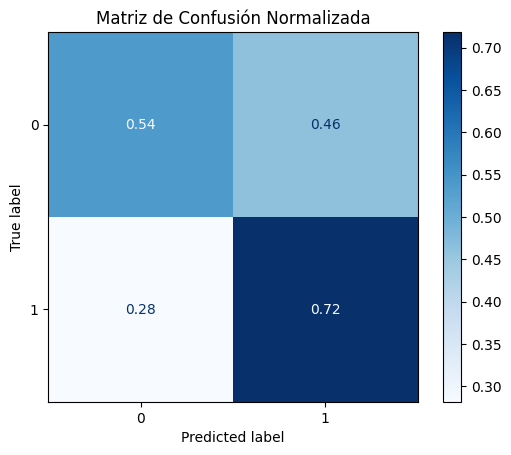

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred_3, normalize='true')

# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Normalizada")
plt.show()

El error más grave es el error tipo II, falso negativo, donde se predice que un hongo es comestible cuando en realidad es venenoso, esto es solo un 28% de los casos, pero es un error que puede ser fatal, ya que se esta poniendo en riesgo la vida de una persona.

El error de tipo I, falso positivo, no es tan terrible porque si se dice que un hongo comestible es venenoso, no hya tanto riesgo porque si se come no pasa nada y si no se come, menos. Aunque este tuvo un valor bastante alto de 46%.

## Parte 5: Comparación de Modelos (10 Pts.)

1. ¿Cuáles son las ventajas y desventajas de utilizar redes bayesianas en comparación con modelos de regresión logística en el contexto del conjunto de datos Mushroom Dataset? Considera la capacidad de capturar relaciones probabilísticas complejas y la interpretabilidad de los resultados.

2. En base a los resultados, ¿qué modelo elegirías para clasificar los hongos entre la R? Justifica tu elección teniendo en cuenta las métricas de evaluación y la gravedad de los errores tipo I y tipo II.

Ventajas: Las redes bayesianas pueden capturar relaciones probabilisticas más complejas y dependencias entre las variables, si es que se tienen y se calculan bien las probabilidades de estas. Además pueden ser muy faciles de interpretar si se grafica la red o si se muestran las probabilidades condicionales de las variables más importantes. Ota de las ventajas es que para los modelos de regresion logistica se supone de antemano linealidad o una pseudo linealidad en los datos, en cambio para las redes bayesianas no.

Desventajas: Los modelos de regresion logistica pueden ser más faciles y rapidos de hacer, además que la interpretacion de los resultados de estos no es mala, para las redes bayesianas es necesario más conocimiento para poder graficar y representar la informacion de una manera sencilla, en cambio para la regresion logistica son numeros.

Por los resultados vistos y explicados anteriormente, considero que la mejor eleccion seria la de utilizar el MLP, pues tuvo un mejor desempeño en general y en la matriz de confusion, tuvo menos falsos negativos que la regresion logistica, lo que es un error más grave. Además, creo que puede ser una especie de "intermedio" entre las redes bayesianas y la regresion logistica, pues puede capturar relaciones complejas como lo hacen las redes bayesianas y tiene la facilidad de interpretacion de los modelos de regresion logistica sin ser necesario graficar o visualizar los datos.  